# Data Exploration of H-MOG Dataset

**Description**   

Basic statistics & visualizations for the H-MOG Dataset, especially considering aggregation on sessions and subjects.

**Purpose**
- Get basic understanding of dataset
- Check for completeness
- Inspect data distribution

**Data Sources**   
- [H-MOG Dataset](http://www.cs.wm.edu/~qyang/hmog.html)  


### Imports

In [1]:
# Standard
from pathlib import Path
import os
import sys
import datetime

# Extra
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.style as style
import seaborn as sns

# `DatasetLoader` is a custom helper class to retrieve data from hdf5 file
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.utility.dataset_loader_hdf5 import DatasetLoader

In [2]:
%matplotlib inline
%run utils.ipynb
utils_set_output_style()

### Configuration

In [3]:
# Various Settings
TABLE_NAME = "sensors_100hz"  # Table with raw sensor data
HMOG_HDF5 = Path.cwd().parent / "data" / "processed" / "hmog_dataset.hdf5"
SEED = 712

FEATURE_COLS = [
    "acc_x",
    "acc_y",
    "acc_z",
    "gyr_x",
    "gyr_y",
    "gyr_z",
    "mag_x",
    "mag_y",
    "mag_z",
]

REPORT_PATH = Path.cwd().parent / "reports" / "figures"  # Figures for thesis
REPORT_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
hmog = DatasetLoader(
    hdf5_file=HMOG_HDF5,
    table_name=TABLE_NAME,
    max_subjects=None,
    task_types=[],
    exclude_subjects=[],   
    exclude_cols=[],
    seed=SEED,
)
hmog.data_summary()

PICKLE 4


,DataFrame,Memory (MB),Rows,Columns,Subjects,Sessions
0,all,13239.87,123955466,13,100,2392
1,index,0.09,2392,4,100,2392


## Exploration

### Basics

In [5]:
hmog.all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123955466 entries, 0 to 71996
Data columns (total 13 columns):
acc_x        float64
acc_y        float64
acc_z        float64
gyr_x        float64
gyr_y        float64
gyr_z        float64
mag_x        float64
mag_y        float64
mag_z        float64
sys_time     int64
subject      object
session      object
task_type    int64
dtypes: float64(9), int64(2), object(2)
memory usage: 12.9+ GB


In [6]:
hmog.all.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,sys_time,subject,session,task_type
0,-1.185430,5.520131,6.492776,0.077885,-0.387594,0.013744,-0.775,-17.321,-30.381,1399073632830,342329,342329_session_3,3
1,-1.240396,5.471416,6.513226,0.045968,-0.376446,-0.044440,-0.611,-17.321,-30.381,1399073632840,342329,342329_session_3,3
2,-1.295362,5.422701,6.533676,0.014050,-0.365297,-0.102625,-0.447,-17.321,-30.381,1399073632850,342329,342329_session_3,3
3,-1.350330,5.373985,6.554127,-0.035430,-0.331700,-0.176235,0.346,-17.321,-30.381,1399073632860,342329,342329_session_3,3
4,-1.405297,5.325269,6.574578,-0.124006,-0.284969,-0.253815,0.030,-16.854,-30.381,1399073632870,342329,342329_session_3,3


In [7]:
hmog.all.describe(include="all", percentiles=[])

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,sys_time,subject,session,task_type
count,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,1.239555e+08,123955466,123955466,1.239555e+08
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,2392,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256487,771782_session_5,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2326559,224813,NaN
mean,1.754039e-01,4.671516e+00,7.644874e+00,1.182403e-02,1.010373e-02,7.436655e-03,-2.721895e+00,-4.509907e+00,-1.255342e+01,1.399221e+12,NaN,NaN,3.363778e+00
std,1.866653e+00,2.162596e+00,1.365915e+00,1.709596e-01,2.086806e-01,2.072633e-01,1.545500e+01,1.610624e+01,2.728261e+01,1.814971e+09,NaN,NaN,1.683130e+00
min,-1.960911e+01,-1.958756e+01,-1.960851e+01,-9.725586e+00,-1.000842e+01,-9.998948e+00,-4.075450e+02,-1.315610e+02,-1.291682e+03,1.396222e+12,NaN,NaN,0.000000e+00
50%,-1.653495e-02,4.914099e+00,7.797258e+00,9.869839e-03,2.392533e-03,-1.269342e-02,-2.927727e+00,-4.447000e+00,-1.592020e+01,1.399418e+12,NaN,NaN,3.000000e+00
max,1.960791e+01,1.814266e+01,1.960851e+01,7.338324e+00,1.004660e+01,8.924130e+00,2.086270e+02,4.701380e+02,4.869550e+02,1.402767e+12,NaN,NaN,6.000000e+00


In [8]:
hmog.all.isna().sum()

acc_x        0
acc_y        0
acc_z        0
gyr_x        0
gyr_y        0
gyr_z        0
mag_x        0
mag_y        0
mag_z        0
sys_time     0
subject      0
session      0
task_type    0
dtype: int64

In [9]:
# Cast subjects to categorical for plotting & memory saving
hmog.all["subject"] = hmog.all["subject"].astype("category")

**Interpretation:**

- All data types look correct
- Ranges for sensordata seem reasonable
- No missing values

### Example Session

In [10]:
np.random.seed(SEED)
session = np.random.choice(hmog.all["session"].unique())
session

'240168_session_17'

In [11]:
df_single_session = hmog.all[hmog.all["session"] == session].copy()
df_single_session["Session Time"] = pd.to_datetime(df_single_session['sys_time'], unit='ms')
df_single_session = df_single_session.set_index("Session Time")
df_single_session.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,sys_time,subject,session,task_type
Session Time,,,,,,,,,,,,,
2014-05-09 00:34:20.540,0.794276,3.730166,8.003817,0.040928,-0.363465,-0.145691,-5.841285,5.754428,-31.589144,1399595660540,240168,240168_session_17,4
2014-05-09 00:34:20.550,0.815376,3.684526,7.992893,0.029583,-0.337023,-0.180468,-5.946715,5.801572,-31.493856,1399595660550,240168,240168_session_17,4
2014-05-09 00:34:20.560,0.836474,3.638887,7.981969,0.018239,-0.310581,-0.215243,-6.052142,5.848714,-31.398572,1399595660560,240168,240168_session_17,4
2014-05-09 00:34:20.570,0.857573,3.593248,7.971046,0.006894,-0.284140,-0.250018,-6.157570,5.895856,-31.303287,1399595660570,240168,240168_session_17,4
2014-05-09 00:34:20.580,0.878672,3.547608,7.960122,-0.004451,-0.257698,-0.284794,-6.263000,5.943000,-31.208000,1399595660580,240168,240168_session_17,4


In [12]:
print("Session duration according to timestamps:")
df_single_session.index.max() - df_single_session.index.min()

Session duration according to timestamps:


Timedelta('0 days 00:10:54.920000')

In [13]:
print(f"Task Type: {int(df_single_session.task_type.unique()[0])}")
print("where\n[1, 3, 5] are sitting \n[2, 4, 6] are walking")

Task Type: 4
where
[1, 3, 5] are sitting 
[2, 4, 6] are walking


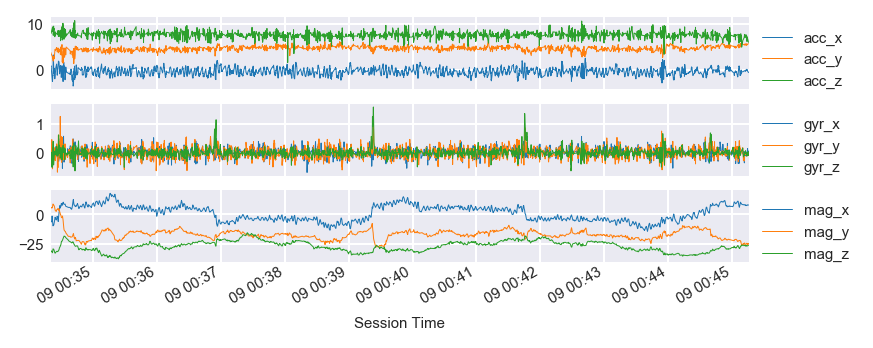

In [14]:
plot_rows = [
    ["acc_x", "acc_y", "acc_z"],
    ["gyr_x", "gyr_y", "gyr_z"],
    ["mag_x", "mag_y", "mag_z"],
]

f, axes = plt.subplots(3, 1, dpi=180, figsize=(5, 2))
for i, row in enumerate(plot_rows):
    g = df_single_session[row].plot(linewidth=0.4, ax=axes[i], sharex="col")
    g.legend(bbox_to_anchor=(1, 1))

utils_save_plot(plt, REPORT_PATH / "hmog-session-sample.png")

### Overall Sensor Data Distribution

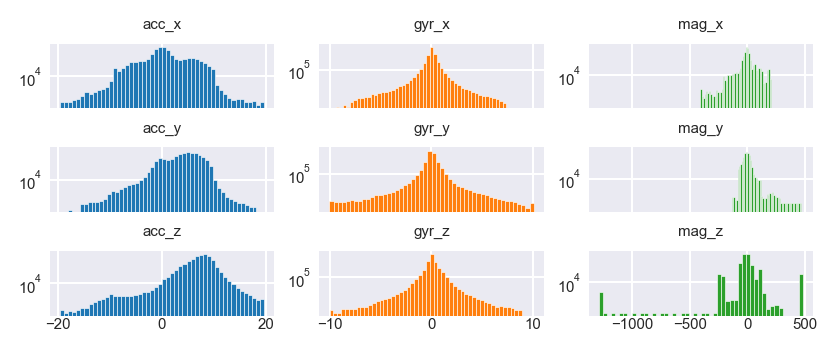

In [15]:
df_temp = hmog.all[FEATURE_COLS]

f, axes = plt.subplots(3, 3, sharex="col", sharey="col", dpi=180, figsize=(5.5, 2))
f.subplots_adjust(hspace=0.6, wspace=0.2)
cmap = cm.get_cmap("tab10")

for i, col in enumerate(df_temp.columns):
    plot_column = int(i // 3)
    plot_row = i - plot_column * 3

    g = sns.distplot(
        df_temp[col],
        kde=False,
        ax=axes[plot_row][plot_column],
        color=cmap(plot_column),
        hist_kws=dict(alpha=1),
    )
    g.set_title(f"{col}")
    g.set_yscale("log")
    g.axes.set_xlabel("")

utils_save_plot(plt, REPORT_PATH / "hmog-sensor-distribution.png")

**Interpretation:**

- The distributions vary a lot from sensor to sensor
- Accelerometer: Left skewed y- and z-axis. Probably towards 10 because of gravity component.
- Gyroscope: very smooth, probably close to normal. Only x-axis is slightly left skewed
- Magnetometer: Strong skewness in all axis. z-axis has some massive outliers.

### Distribution per Subjects

**Sensor Data Distribution**

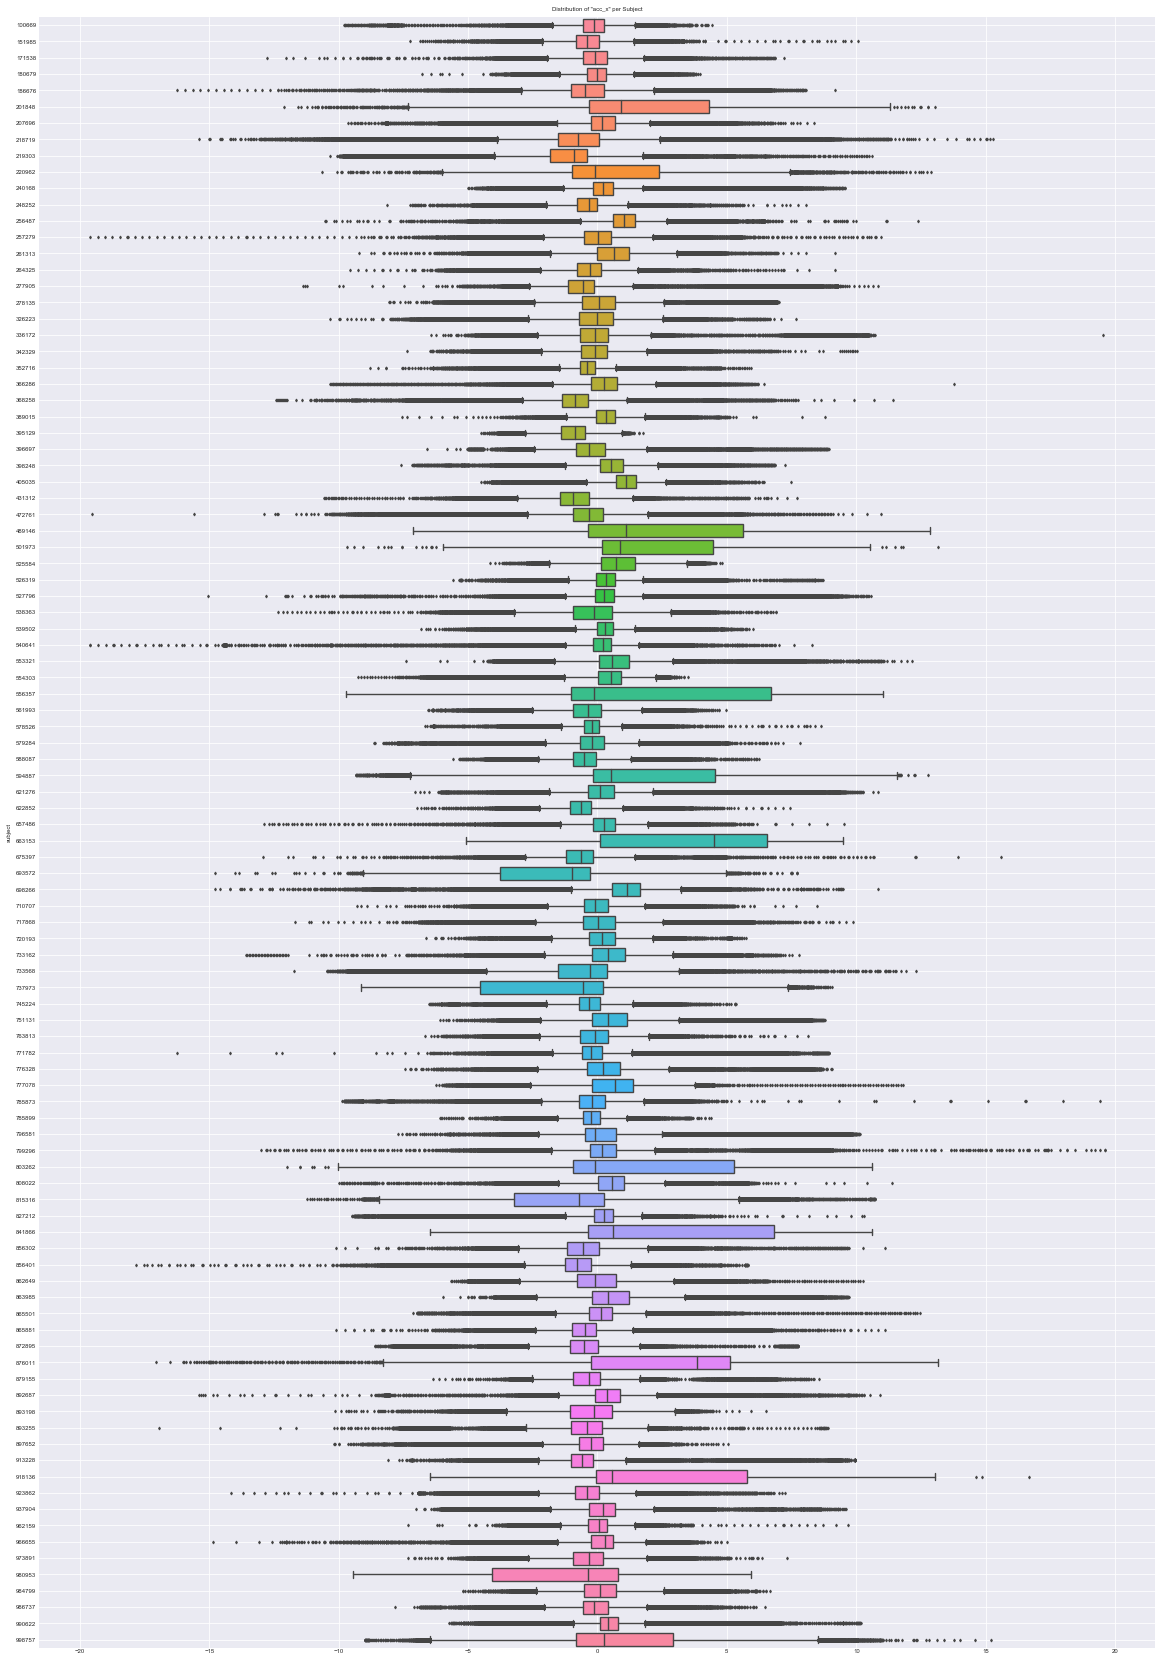

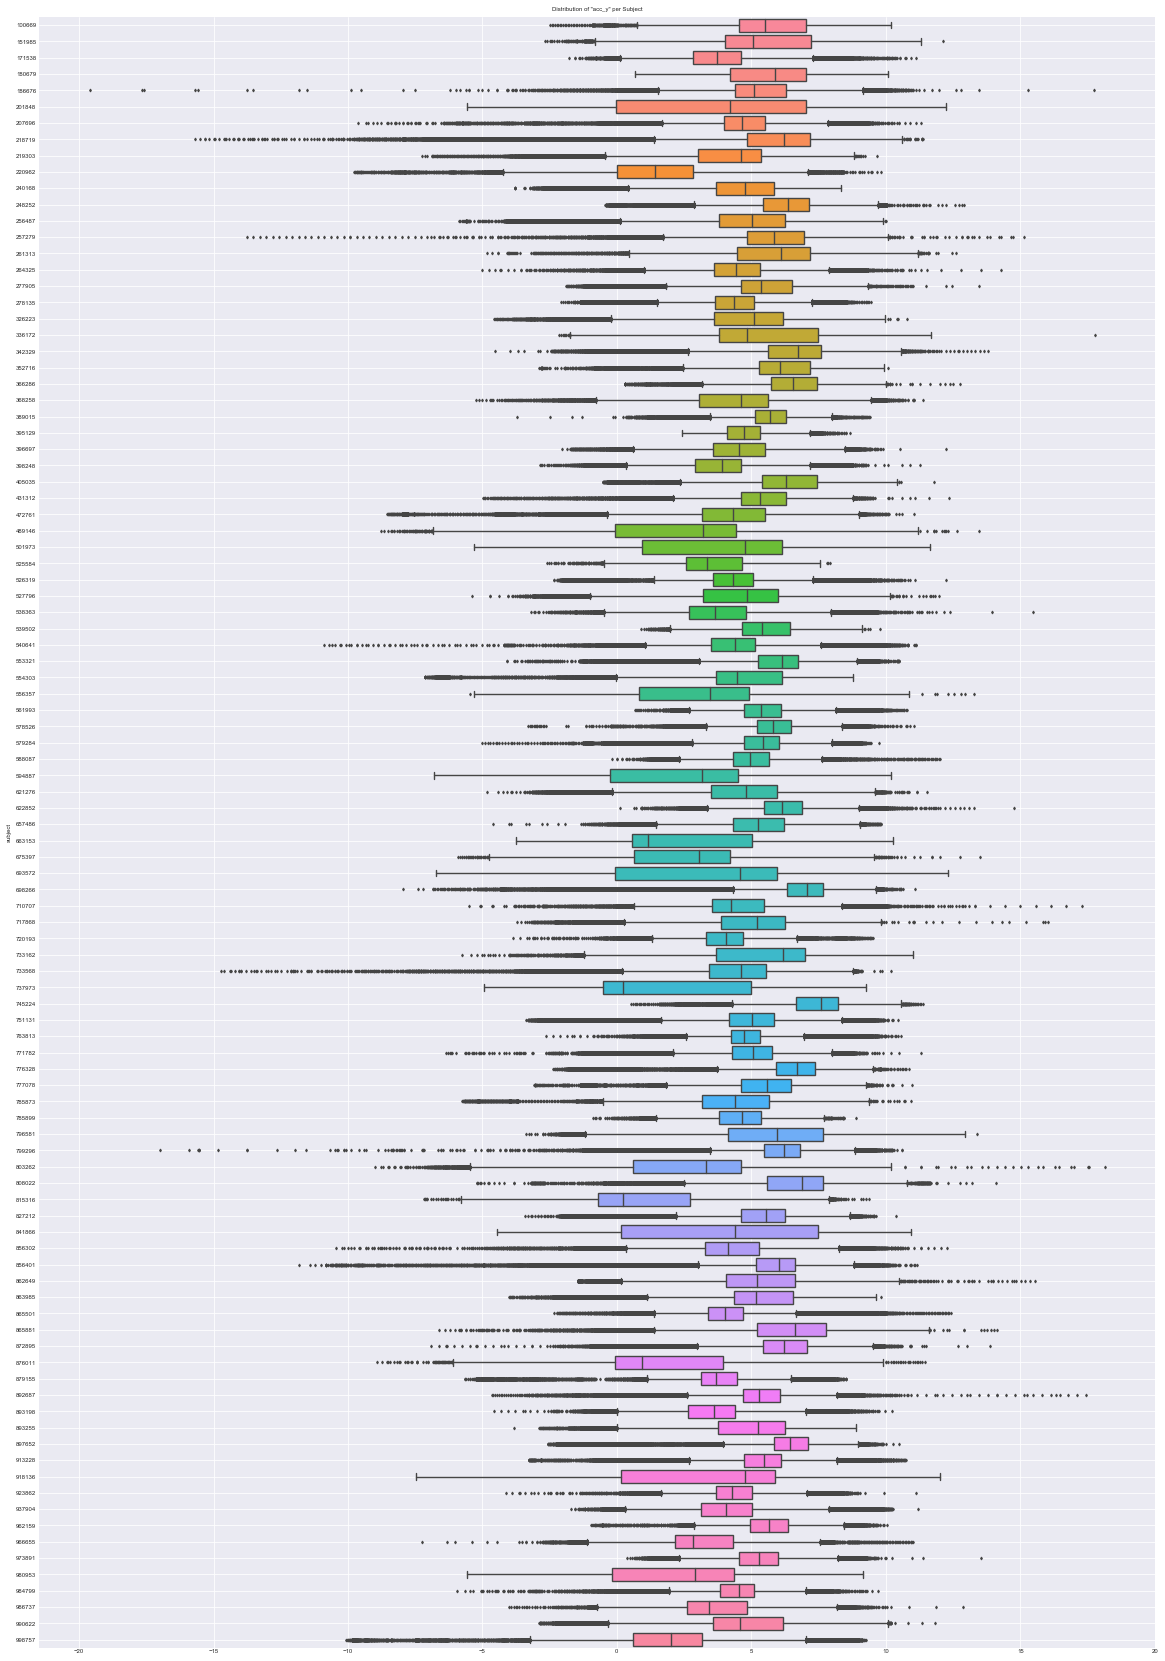

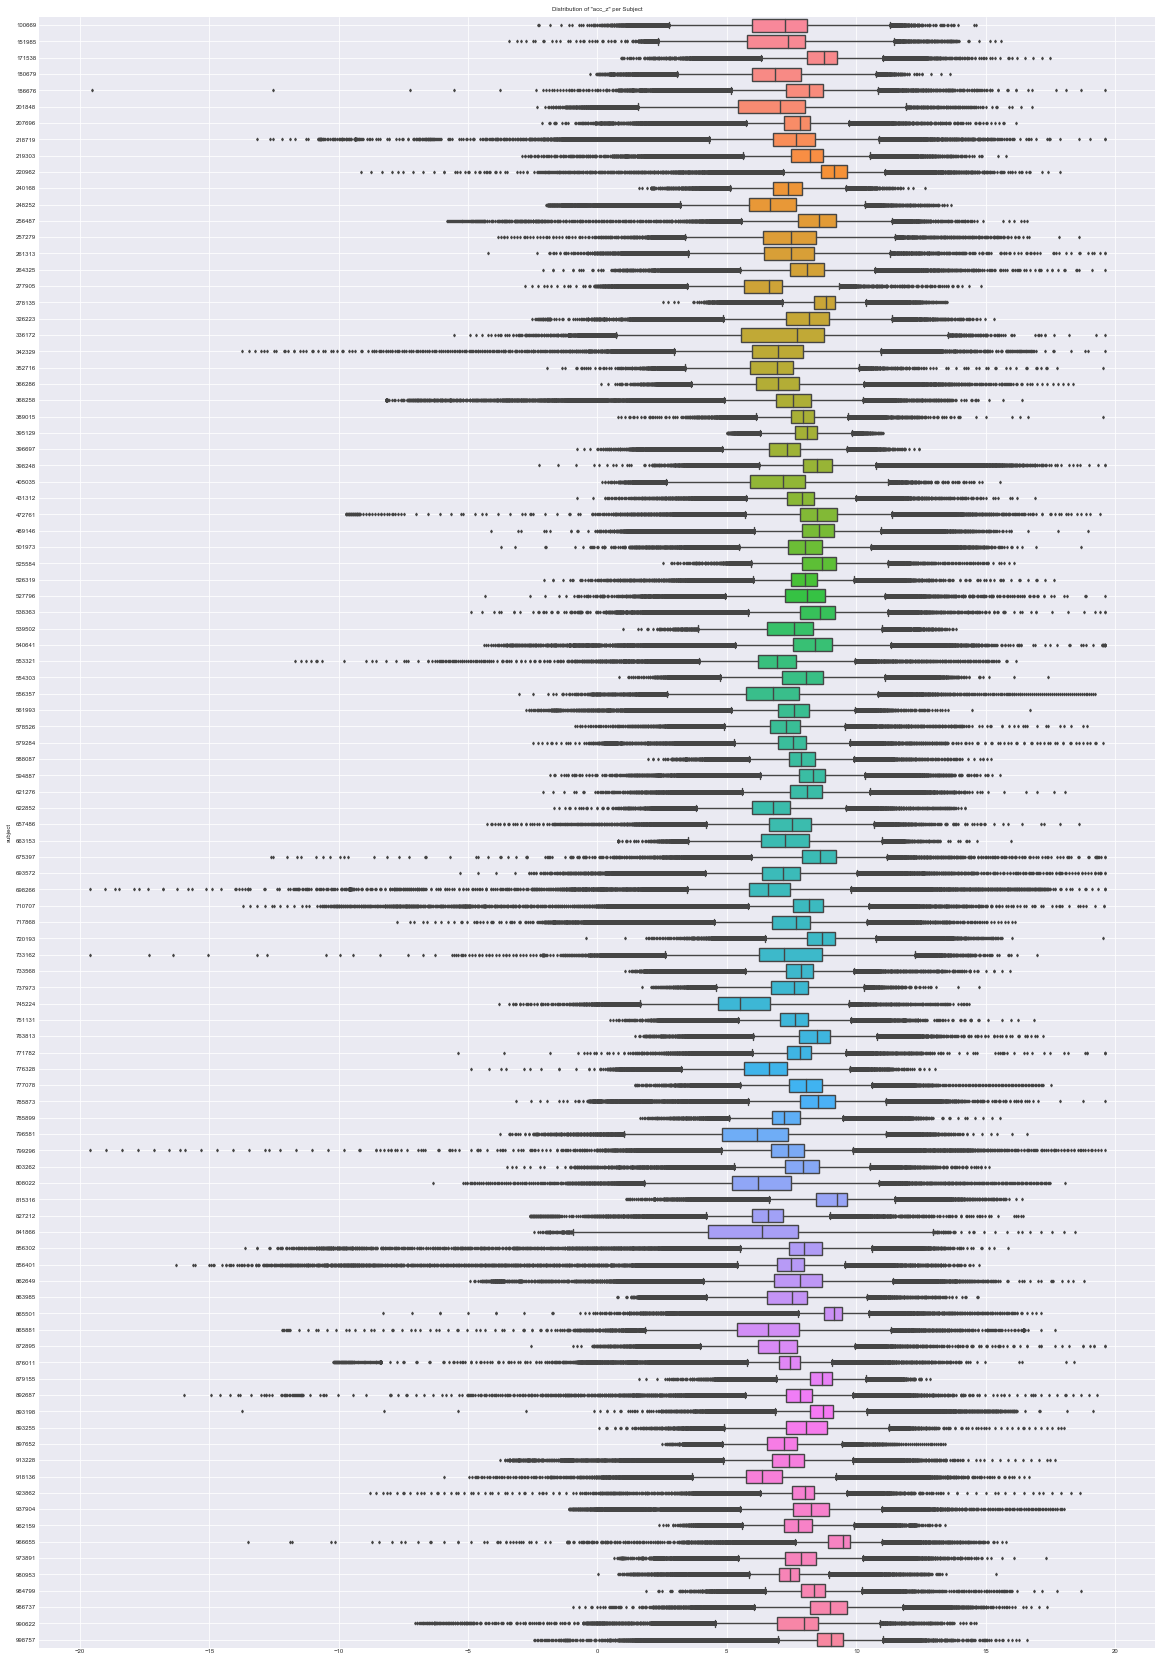

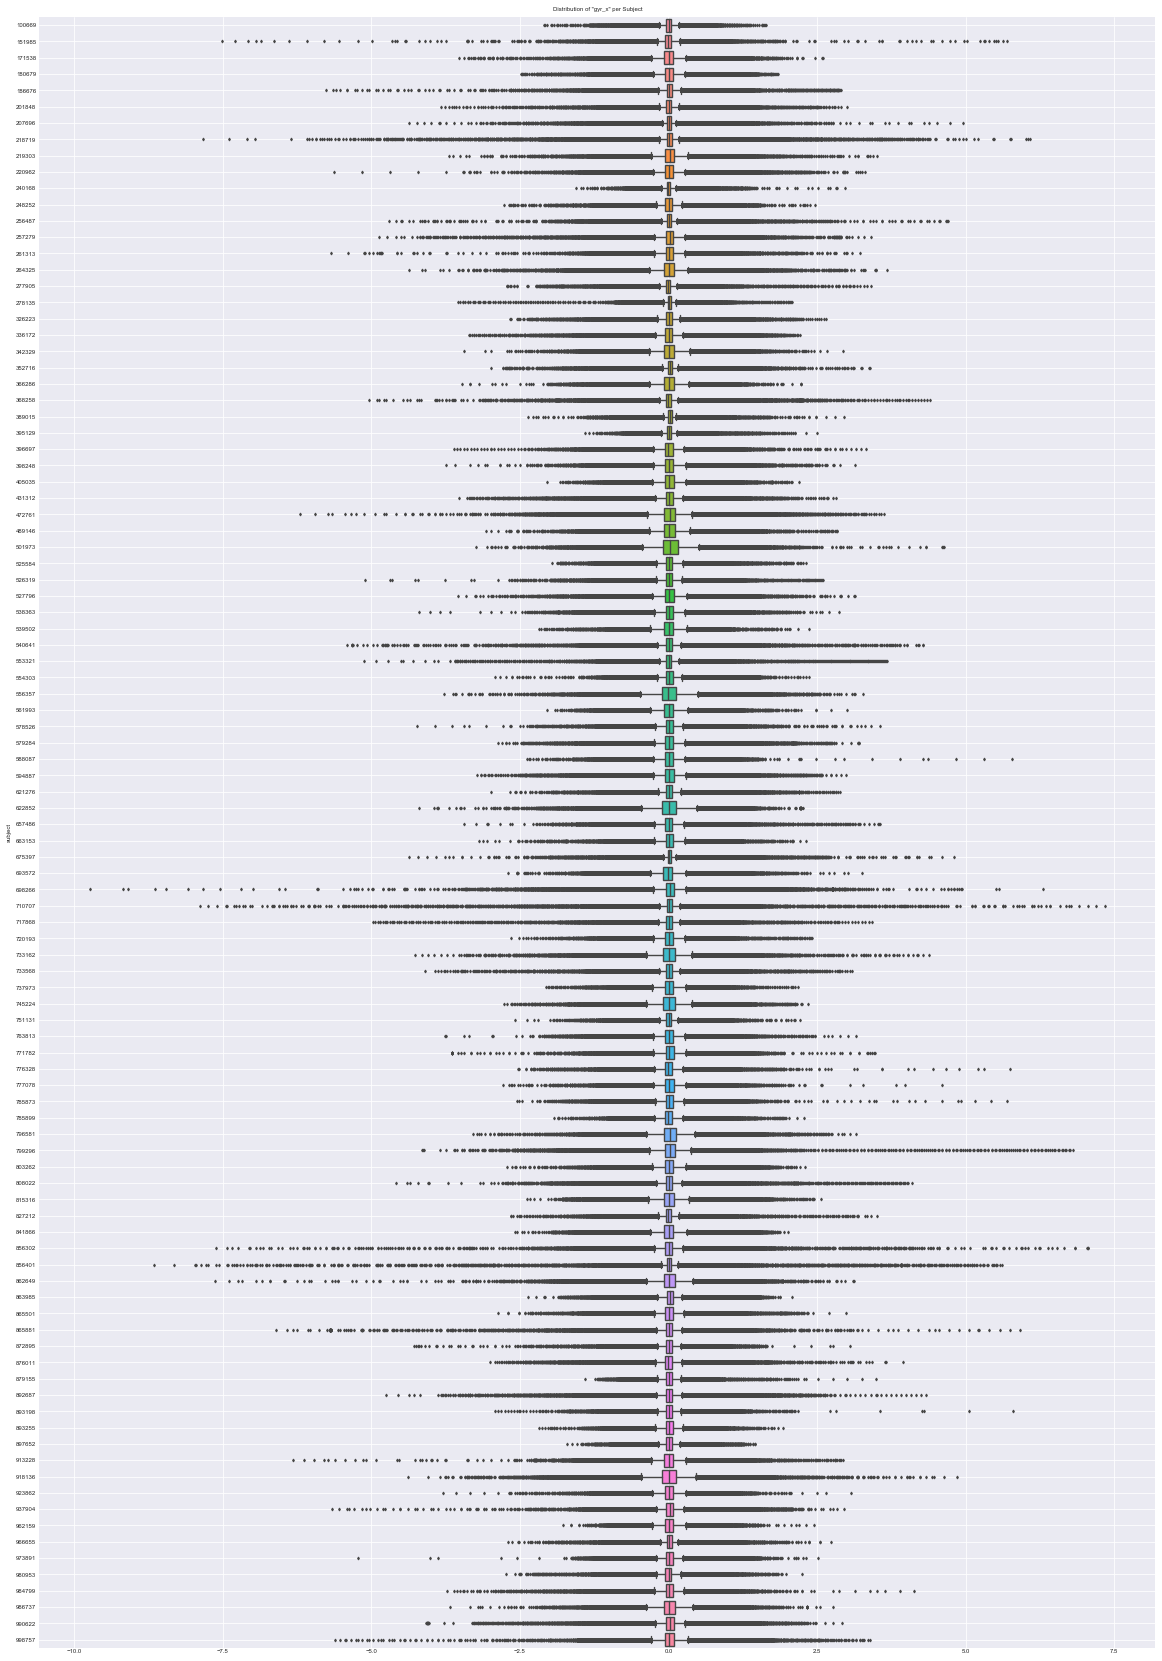

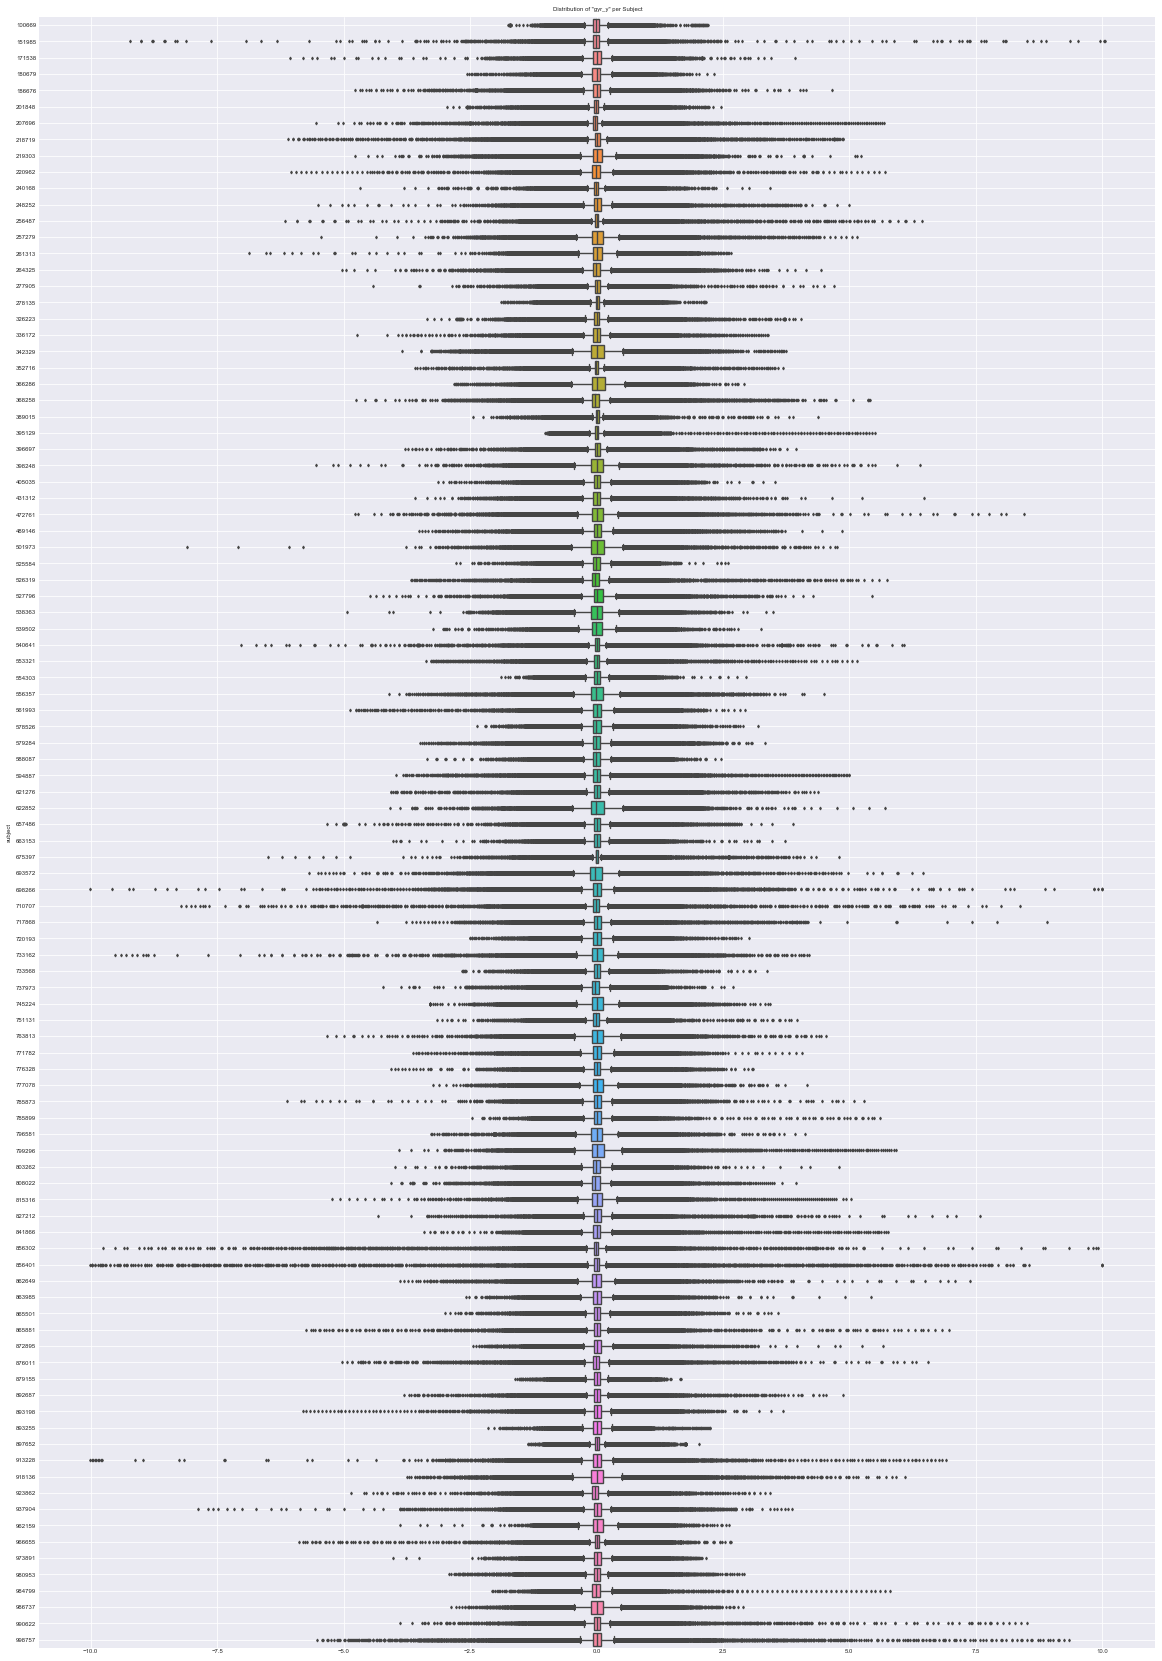

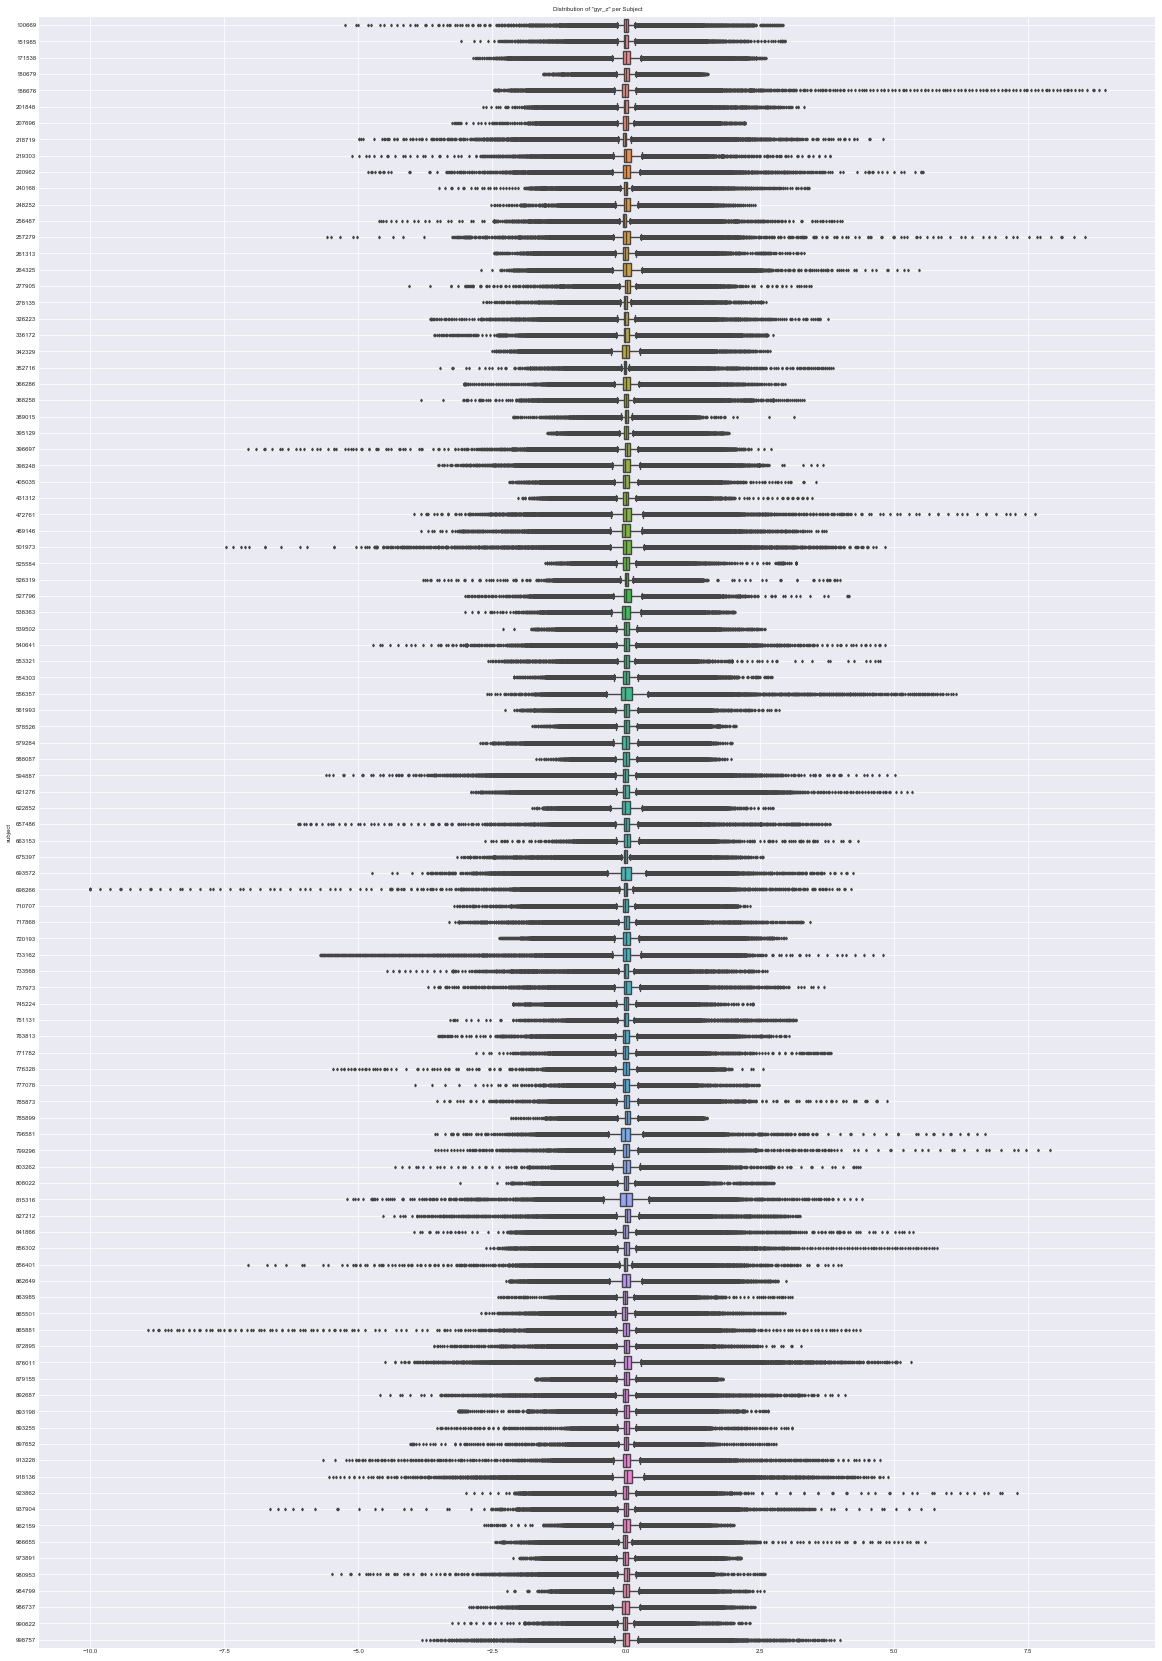

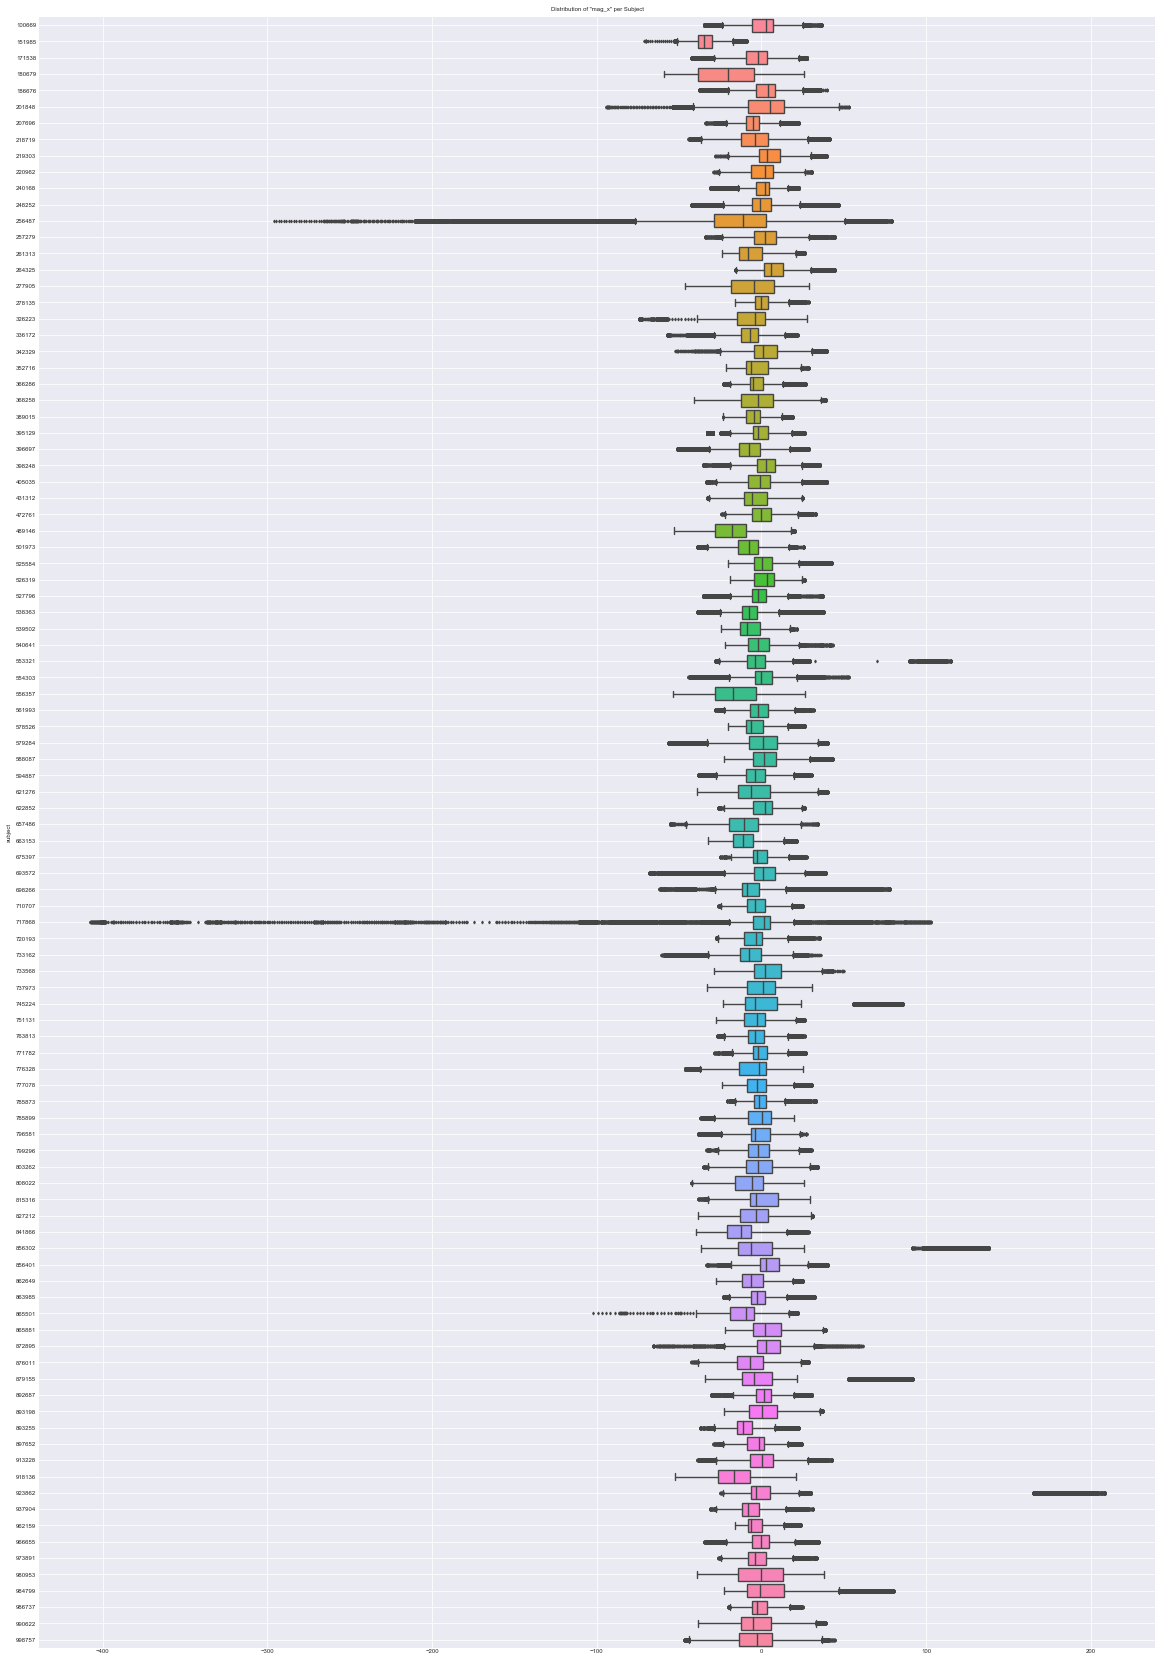

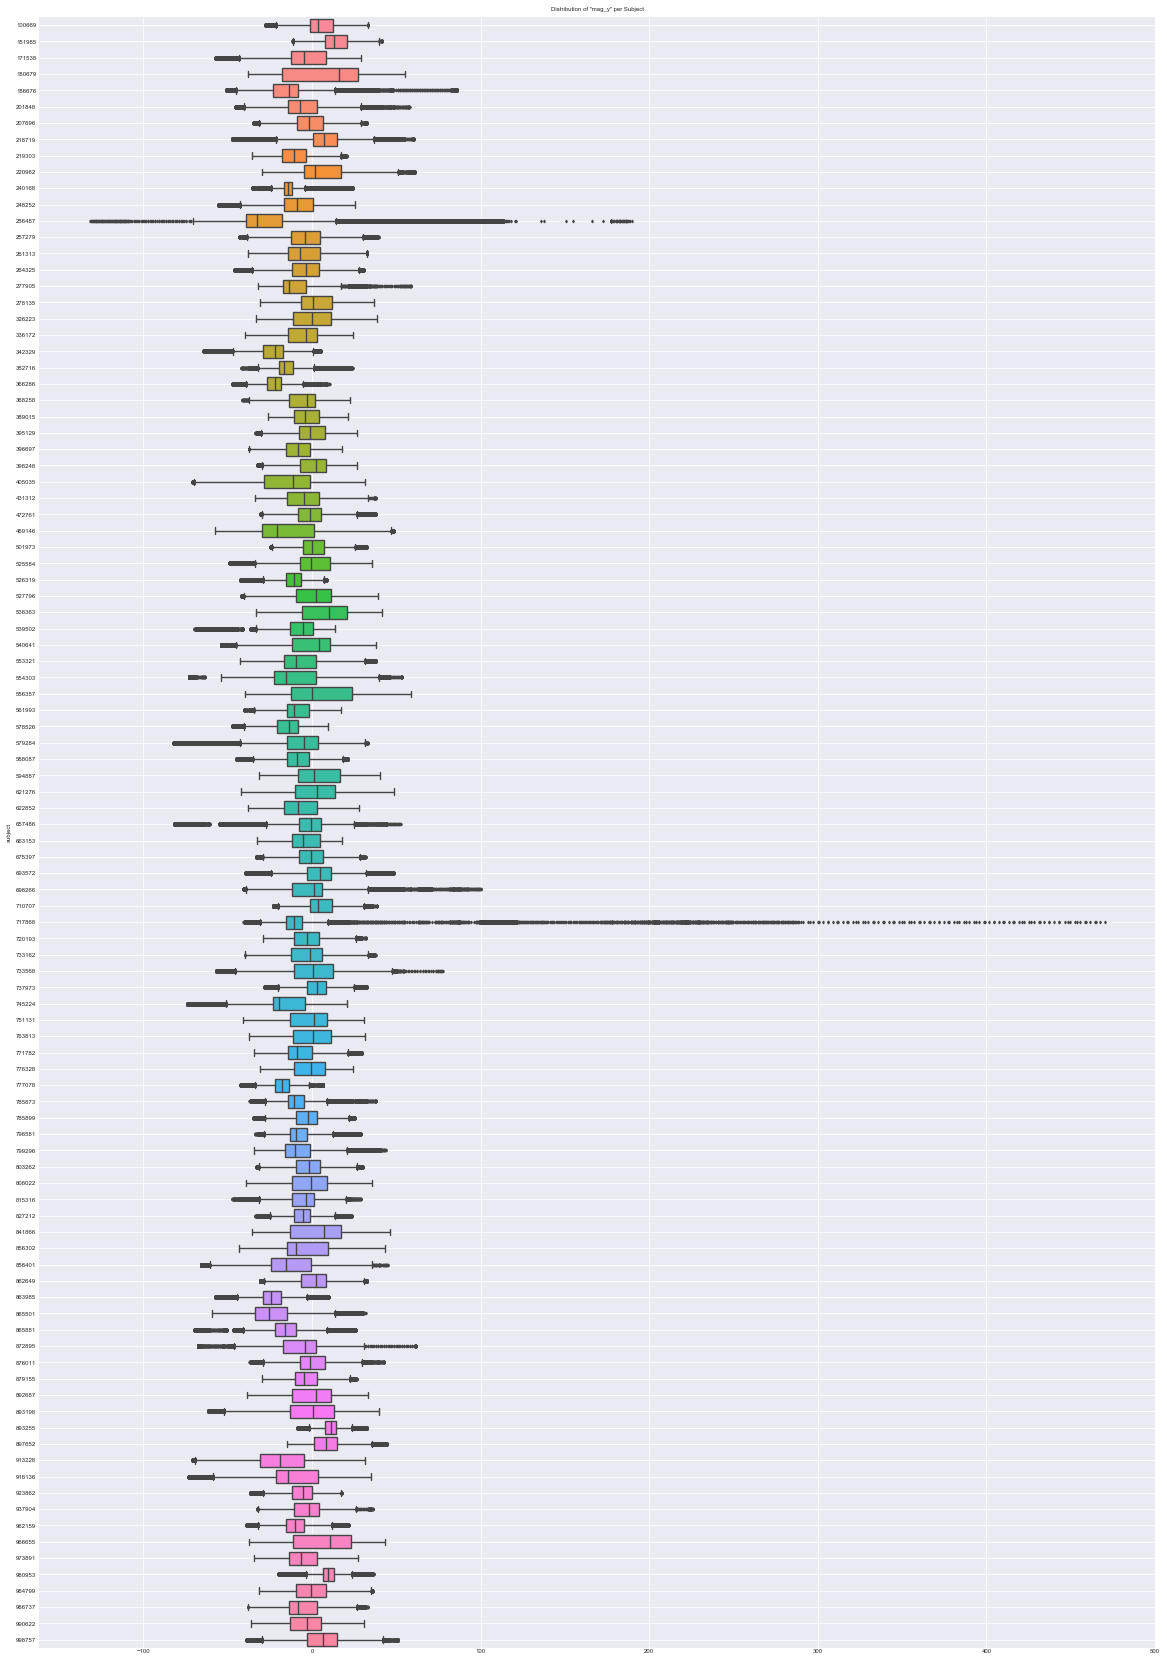

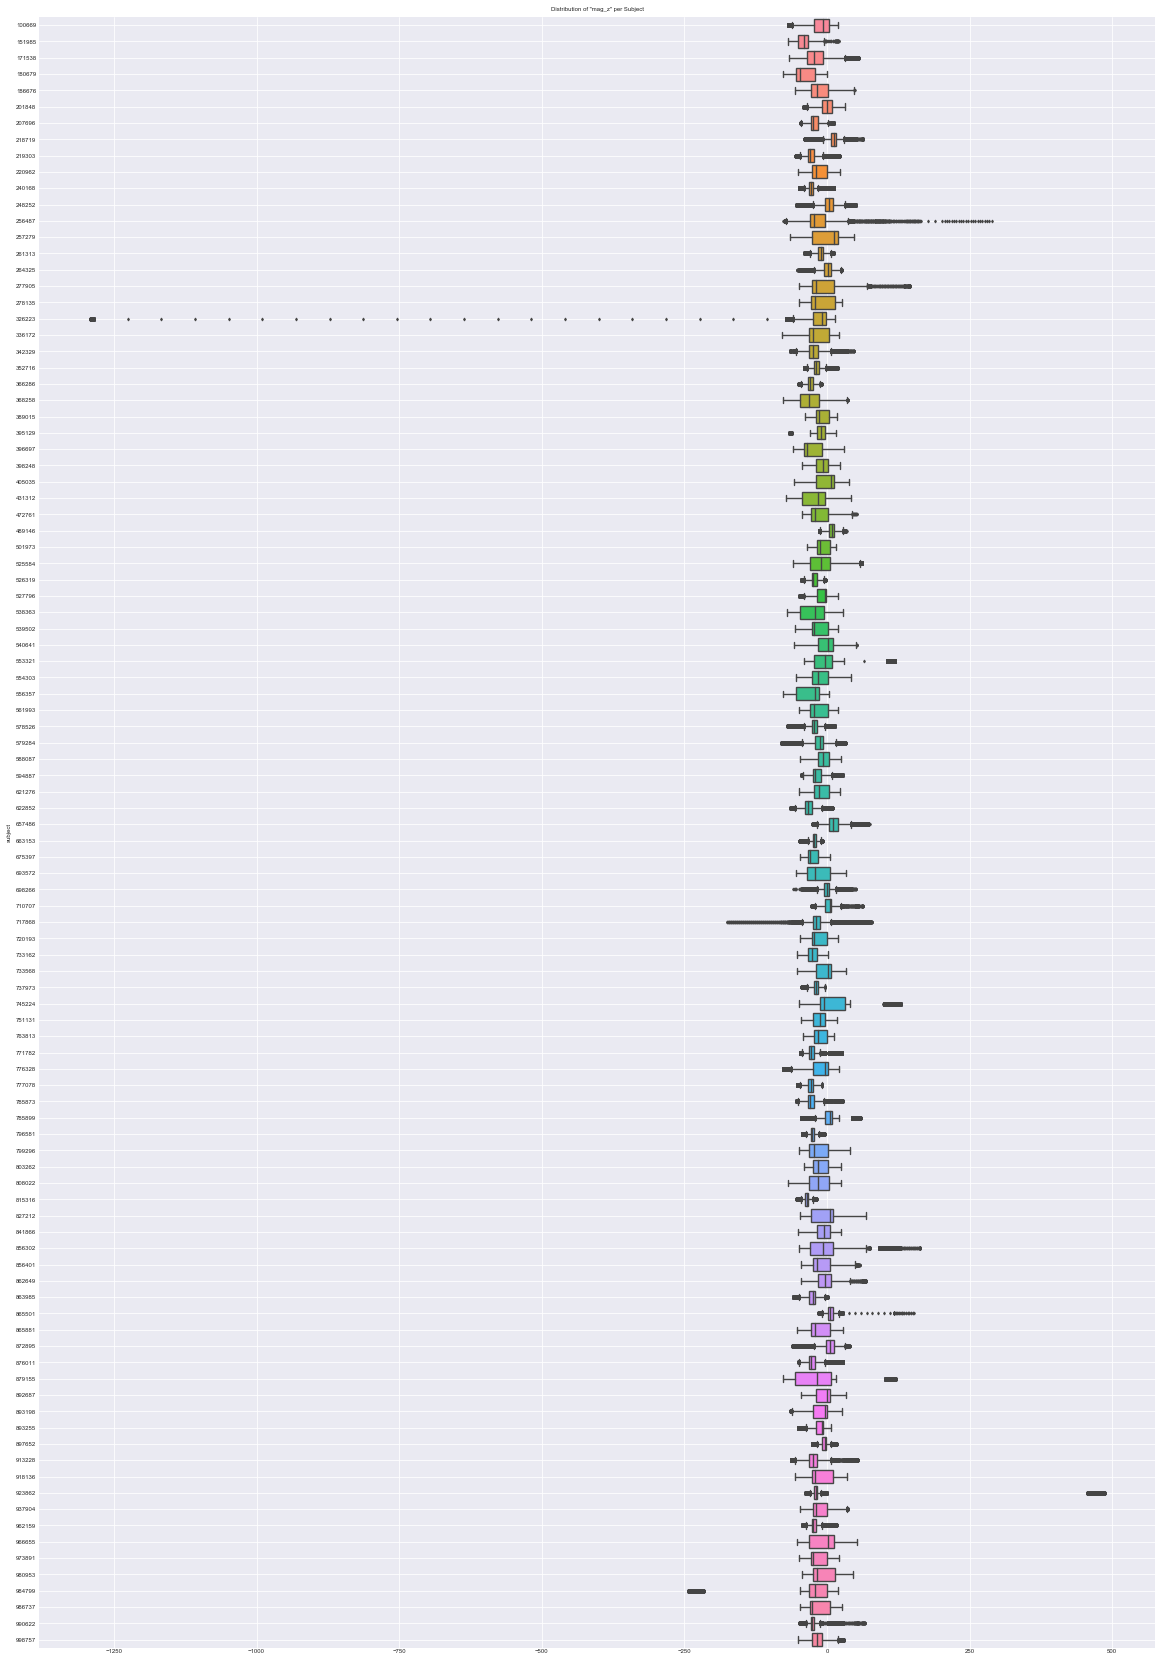

In [18]:
for i, col in enumerate(FEATURE_COLS):
    plt.figure(i, figsize=(20, 30))
    g = sns.boxplot(
        y="subject",
        x=col,
        data=hmog.all,
        orient="h",
        fliersize=2,
        saturation=1,
    )
    g.set_title(f'Distribution of "{col}" per Subject')
    g.axes.set_xlabel("")
    g.axes.xaxis.grid(True)
    g.axes.yaxis.grid(True)

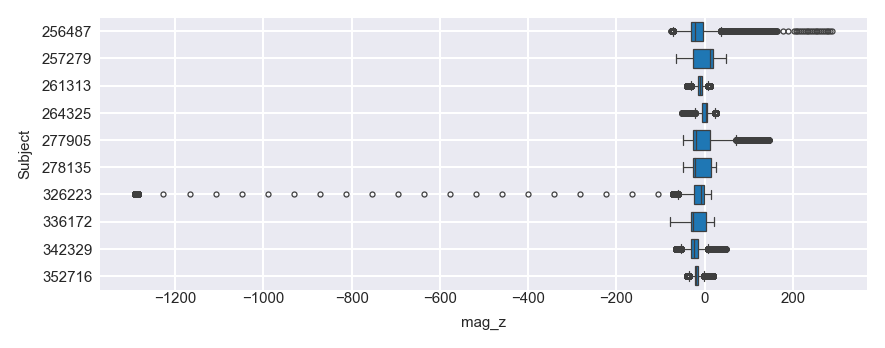

In [19]:
# Partial plot for use in thesis
subjects = [
    "256487",
    "257279",
    "261313",
    "264325",
    "277905",
    "278135",
    "326223",
    "336172",
    "342329",
    "352716",
]
df_temp = hmog.all[hmog.all["subject"].isin(subjects)].copy(deep=True)
df_temp["Subject"] = df_temp["subject"].cat.remove_unused_categories()

plt.figure(dpi=180, figsize=(5.5, 2))
g = sns.boxplot(
    y="Subject",
    x="mag_z",
    data=df_temp,
    orient="h",
    **utils_boxplot_style
)
g.axes.xaxis.grid(True)
g.axes.yaxis.grid(True)

utils_save_plot(plt, REPORT_PATH / "hmog-mag-outlier.png")

**Sessions per Subjects**

In [20]:
# Add session number as column
hmog.all["session_number"] = hmog.all["session"].str.rsplit("_", n=1).str[-1].astype("int")
hmog.all.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,sys_time,subject,session,task_type,session_number
0,-1.185430,5.520131,6.492776,0.077885,-0.387594,0.013744,-0.775,-17.321,-30.381,1399073632830,342329,342329_session_3,3,3
1,-1.240396,5.471416,6.513226,0.045968,-0.376446,-0.044440,-0.611,-17.321,-30.381,1399073632840,342329,342329_session_3,3,3
2,-1.295362,5.422701,6.533676,0.014050,-0.365297,-0.102625,-0.447,-17.321,-30.381,1399073632850,342329,342329_session_3,3,3
3,-1.350330,5.373985,6.554127,-0.035430,-0.331700,-0.176235,0.346,-17.321,-30.381,1399073632860,342329,342329_session_3,3,3
4,-1.405297,5.325269,6.574578,-0.124006,-0.284969,-0.253815,0.030,-16.854,-30.381,1399073632870,342329,342329_session_3,3,3


In [21]:
df_subjects = (
    hmog.all.groupby("subject").agg({"session": ["nunique", "count"]}).reset_index()
)
df_subjects.columns = ["subject", "sessions", "samples"]
df_subjects["mean_min_per_session"] = df_subjects["samples"] / df_subjects["sessions"] / 100 / 60
df_subjects = df_subjects.sort_values("samples", ascending=False).reset_index(drop=True)
df_subjects.head()

,subject,sessions,samples,mean_min_per_session
0,256487,24,2326559,16.156660
1,389015,24,2152787,14.949910
2,856401,24,2028491,14.086743
3,876011,24,1991091,13.827021
4,218719,24,1930288,13.404778


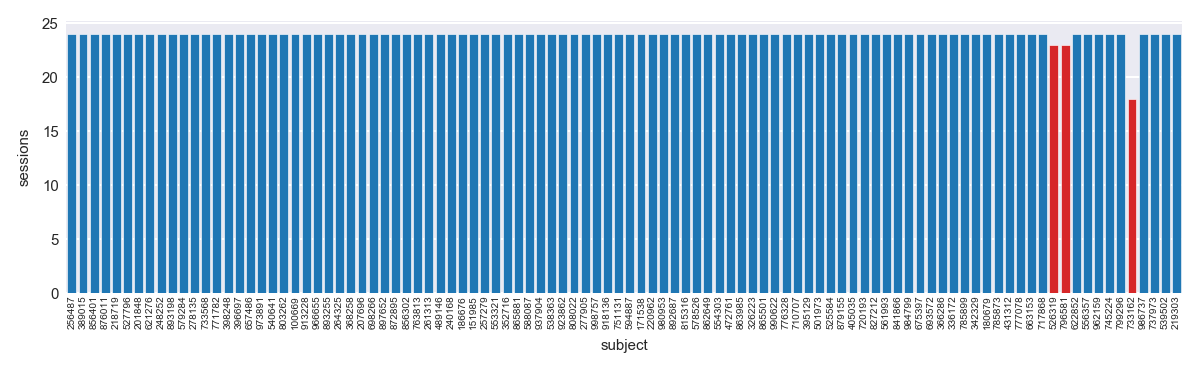

In [22]:
plt.figure(dpi=180, figsize=(8, 2))
clrs = [
    "tab:red" if (x in ("733162", "796581", "526319")) else "tab:blue"
    for x in df_subjects["subject"]
]
sns.barplot(
    x="subject",
    y="sessions",
    data=df_subjects,
    palette=clrs,
    order=df_subjects["subject"],
    saturation=1,
)
plt.xticks(rotation=90, fontsize=4);

**Samples per Subjects**

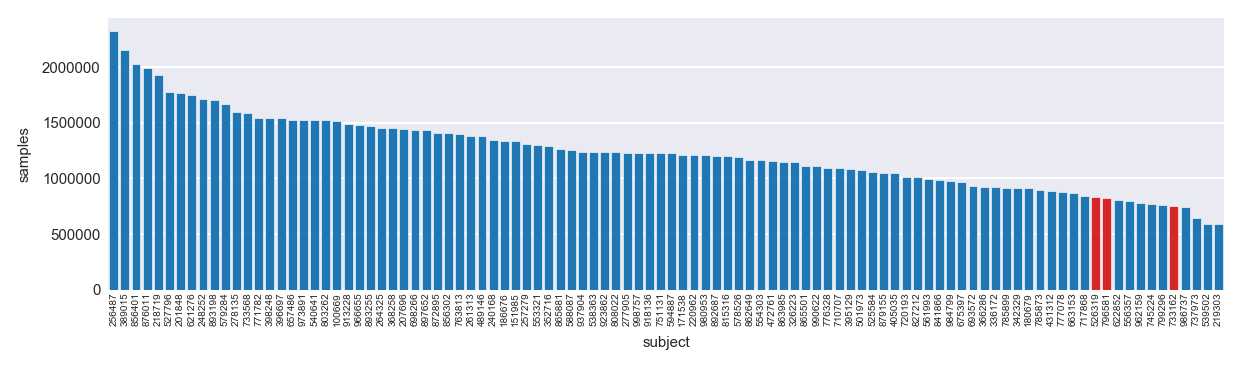

In [23]:
plt.figure(dpi=180, figsize=(8, 2))
clrs = [
    "tab:red" if (x in ("733162", "796581", "526319")) else "tab:blue"
    for x in df_subjects["subject"]
]
sns.barplot(
    x="subject",
    y="samples",
    data=df_subjects,
    palette=clrs,
    order=df_subjects["subject"],
    saturation=1,
)
plt.xticks(rotation=90, fontsize=4);
utils_save_plot(plt, REPORT_PATH / "hmog-samples-dist.pdf")

**Task Types per Subjects**

In [28]:
# Add session task type as dummies
df_task_dummies = pd.get_dummies(hmog.index['task_type'])
dummy_columns = ["taskid_" + str(col) for col in df_task_dummies.columns]
df_task_dummies.columns = dummy_columns
df_task_types = pd.concat([hmog.index, df_task_dummies], axis=1)

In [29]:
df_tasks = (
    df_task_types.groupby("subject")[dummy_columns].sum()
)

In [30]:
# Mapping according to hmog-docu:
df_tasks.columns = [
    "read + sit",
    "read + walk",
    "write + sit",
    "write + walk",
    "map + sit",
    "map + walk",
]

In [31]:
df_tasks.head()

,read + sit,read + walk,write + sit,write + walk,map + sit,map + walk
subject,,,,,,
100669,4,4,4,4,4,4
151985,4,4,4,4,4,4
171538,4,4,4,4,4,4
180679,4,4,4,4,4,4
186676,4,4,4,4,4,4


In [34]:
df_tasks[df_tasks < 4].dropna(axis=0, how="all")

,read + sit,read + walk,write + sit,write + walk,map + sit,map + walk
subject,,,,,,
526319,NaN,NaN,NaN,NaN,NaN,3.0
733162,NaN,NaN,3.0,3.0,3.0,1.0
796581,3.0,NaN,NaN,NaN,NaN,NaN


**Interpretation:** The three subjects above have missing sessions (< 4) for certain task types and should be excluded.

### Distributions per Sessions

In [35]:
aggs = ["mean", "std"]
df_session = hmog.all.groupby(["subject", "session_number"]).agg(
    {
        "acc_x": aggs,
        "acc_y": aggs,
        "acc_z": aggs,
        "gyr_x": aggs,
        "gyr_y": aggs,
        "gyr_z": aggs,
        "mag_x": aggs,
        "mag_y": aggs,
        "mag_z": aggs,
        "task_type": ["median", "count"],
    }
)

In [36]:
df_session.columns = ["_".join(col) for col in df_session.columns]
df_session = df_session.rename(columns={"task_type_count": "value_count"}).reset_index()
df_session["Session Duration in Minutes"] = df_session["value_count"] / 100 / 60
df_session["Samples per Session"] = df_session["value_count"]

In [37]:
df_session.head()

,subject,session_number,acc_x_mean,acc_x_std,acc_y_mean,acc_y_std,acc_z_mean,acc_z_std,gyr_x_mean,gyr_x_std,gyr_y_mean,gyr_y_std,gyr_z_mean,gyr_z_std,mag_x_mean,mag_x_std,mag_y_mean,mag_y_std,mag_z_mean,mag_z_std,task_type_median,value_count,Session Duration in Minutes,Samples per Session
0,100669,1,-0.520849,0.939163,6.693916,0.847856,6.247475,0.724429,-0.002640,0.067646,-0.015322,0.057995,-0.025233,0.096079,-17.160741,2.112589,20.278229,2.930276,-29.528778,1.308334,1,78117,13.019500,78117
1,100669,2,-0.229571,0.407601,7.460647,0.619245,5.514775,0.820172,-0.002929,0.093826,-0.025059,0.099088,-0.023074,0.047261,-15.888098,1.365652,16.732562,2.442309,-26.565749,1.426067,3,109172,18.195333,109172
2,100669,3,-0.210573,0.452553,6.848979,1.466300,5.977902,1.195907,0.000237,0.087485,-0.023031,0.089389,-0.022711,0.044976,-16.135071,0.751890,18.551714,5.078402,-27.703363,1.806159,3,94743,15.790500,94743
3,100669,4,0.013836,0.688999,4.706553,0.729543,7.741479,0.534117,0.003221,0.093958,0.016462,0.205066,0.055296,0.253672,-19.743393,7.655460,11.751817,4.310025,-39.175828,4.875234,2,51969,8.661500,51969
4,100669,5,-0.038892,0.562523,4.622535,0.624875,7.971410,0.534906,0.008376,0.094628,-0.008233,0.209332,0.020011,0.247850,-2.400062,6.579658,-10.824765,9.607490,-42.493030,27.933139,6,37088,6.181333,37088


Histogramm of session duration, for all 2392 sessions


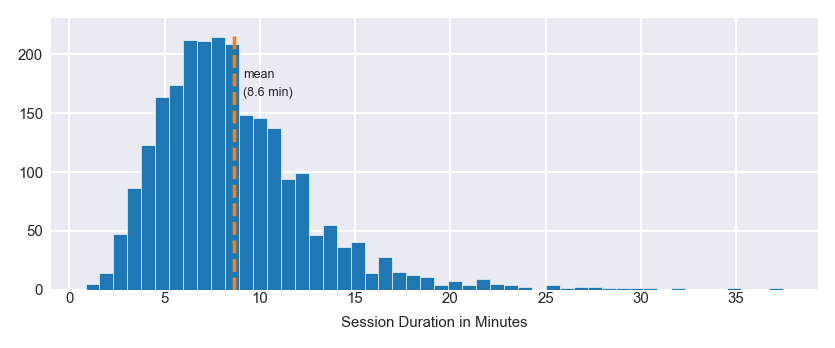

In [68]:
print(f"Histogramm of session duration, for all {len(df_session)} sessions")
mean_duration = df_session["Session Duration in Minutes"].mean()
fig = plt.figure(dpi=180, figsize=(5.5, 2))
g = sns.distplot(
    df_session["Session Duration in Minutes"], kde=False, hist_kws=dict(alpha=1)
)
g.set_xlabel("Session Duration in Minutes")
plt.plot(
    [mean_duration, mean_duration], [0, 220], linestyle="dashed"
)
plt.text(
    mean_duration + 0.5,
    180,
    "mean",
    fontsize=5,
    
)
plt.text(
    mean_duration + 0.5,
    165,
    f"({mean_duration:.1f} min)",
    fontsize=5,
    
)
plt.xticks()
plt.yticks()
utils_save_plot(plt, REPORT_PATH / "hmog-session-duration.pdf")

Histogramm of session samples, for all 2392 sessions


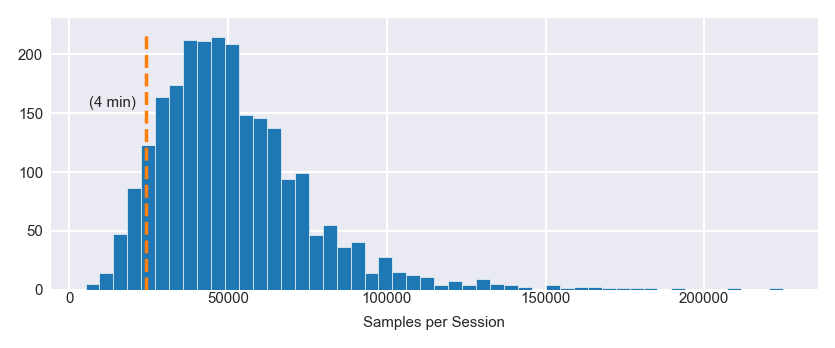

In [75]:
print(f"Histogramm of session samples, for all {len(df_session)} sessions")

fig = plt.figure(dpi=180, figsize=(5.5, 2))
g = sns.distplot(df_session["Samples per Session"], kde=False, hist_kws=dict(alpha=1))
g.set_xlabel("Samples per Session")
plt.plot([24000, 24000], [0, 220], linestyle="dashed")
plt.text(21000, 155, "(4 min)", fontsize=6, horizontalalignment="right")
plt.xticks()
plt.yticks()
utils_save_plot(plt, REPORT_PATH / "hmog-session-samples.pdf")